Filtering the dataset and showing some basic information about it

In [1]:
%matplotlib inline
import os
import sys
parent_path = os.path.abspath(os.path.join('..'))
if parent_path not in sys.path:
    sys.path.append(parent_path)

In [2]:
import pickle
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from preprocess.data_handler import load_data, get_term_set
from preprocess.preproc import filt_terms, filt_duplicates, filt_rares, terms_freq, terms_per_cp

DATA = '../data/'
rawdata = os.path.join(DATA, 'DatasetRaw.csv')

d = load_data(rawdata)
columns = ("[" + ",".join(["'%s'" % column for column in d.columns.values]) + "]")
print("Columns of dataset: %s" % columns)
print("Number of examples in dataset: %s" % str(d.shape[0]))
print("Number of MeSH terms: %s" % len(get_term_set(d['Terms'])))

Columns of dataset: ['CID','SMILES','Name','Formula','Terms','TreeIds']
Number of examples in dataset: 15474
Number of MeSH terms: 489


Filtering: only compounds annotated with "Pharmacologic Actions" MeSH terms ('D27.505' branch) are kept, duplicated examples (with same SMILES) are excluded, as well as terms with absolute frequency < 20

In [18]:
d = filt_terms(d, 'D27.505')
d = filt_duplicates(d)
d = filt_rares(d, 20)

print("Number of examples after filtering: %s" % str(d.shape[0]))
print("Number of MeSH terms: %s" % len(get_term_set(d['Terms'])))

Number of examples after filtering: 9174
Number of MeSH terms: 191


Visualize some examples in the dataset:

In [19]:
for i in range(3):
    print(d.at[i, 'CID'], d.at[i, 'SMILES'], '...', d.at[i, 'Terms'], d.at[i, 'TreeIds'])

1 CC(=O)OC(CC(=O)[O-])C[N+](C)(C)C ... ['Nootropic Agents', 'Vitamin B Complex'] ['D27.505.954.427.637', 'D27.505.696.377.605.600.708']
19 C1=CC(=C(C(=C1)O)O)C(=O)O ... ['Iron Chelating Agents'] ['D27.505.519.914.500.410']
72 C1=CC(=C(C=C1C(=O)O)O)O ... ['Anticarcinogenic Agents'] ['D27.505.696.706.018', 'D27.505.954.248.125']


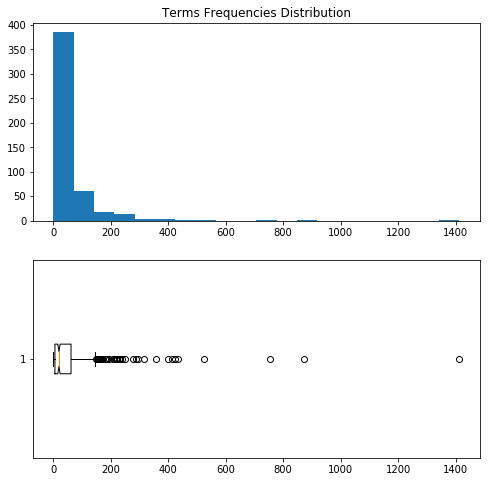

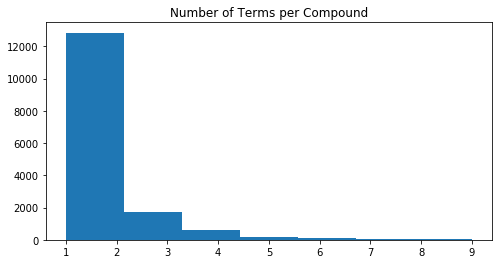

In [6]:
# Terms frequencies
frequency = terms_freq(d['Terms']).values()
# number of terms associated with each compound
t_per_cp = terms_per_cp(d).values()

plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.hist(frequency, bins=20)
plt.title("Terms Frequencies Distribution")
plt.subplot(2,1,2)
plt.boxplot(frequency, notch=True, vert=False)
plt.figure(figsize=(8, 4))
plt.hist(t_per_cp, bins=7)
plt.title("Number of Terms per Compound")
plt.show()

In order to build our fingerprint embedder, it's interesting to visualize some properties of the SMILES strings present in the dataset

In [10]:
charset = set()
lengths = np.zeros((len(d['SMILES']), 1), dtype=int)
for i, smiles in enumerate(d['SMILES']):
    lengths[i] = len(smiles)
    smiles_set = set(list(smiles))
    charset.update(smiles_set)

charset = list(charset)
charset.sort()
print('V = ', charset)
print('|V| = ', len(charset))

V =  ['#', '(', ')', '+', '-', '.', '1', '2', '3', '4', '5', '6', '7', '8', '9', '=', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Z', '[', ']', 'a', 'b', 'c', 'd', 'e', 'g', 'h', 'i', 'l', 'm', 'n', 'o', 'r', 's', 't', 'u', 'y']
|V| =  58


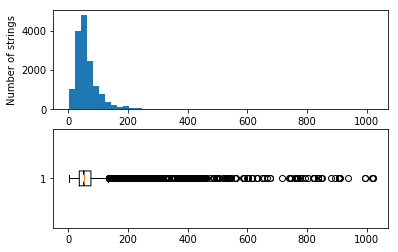

Min - Max - Average - Median SMILES length:  1 1021 67.3561457929 52.0


In [11]:
plt.subplot(2,1,1)
plt.hist(lengths, bins=50)
plt.xlabel('Length of SMILES')
plt.ylabel('Number of strings')

plt.subplot(2,1,2)
plt.boxplot(lengths, notch=True, vert=False)
plt.show()

print('Min - Max - Average - Median SMILES length: ',lengths.min(), lengths.max(), lengths.mean(), np.median(lengths))